In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "C:\\Users\\User\\Desktop\\without_DM_cases.csv"

In [3]:
df = pd.read_csv(PATH, encoding = 'big5')

In [4]:
df = df.rename(columns={'Unnamed: 0': 'name'})

In [5]:
df.head(4)

,name,No,total,lacune,microbleeds,PVS,WMH,frontal_mean,Parietal_mean,WM_mean,CH_mean,BG_mean,TH_mean,GM_mean,total_mean
0,田豐建,17632811,5,20,10,11,3,0.025921,0.027090,0.026505,0.030644,0.021889,0.050632,0.049997,0.031235
1,李水清,16066359,5,20,10,11,3,0.001295,0.002695,0.001995,0.002601,0.006266,0.006790,0.005219,0.003929
2,王月霞,6172756,5,15,30,13,3,0.052503,0.036393,0.044448,0.027341,0.054574,0.027027,0.036314,0.039568
3,朱黃彩華,4044501,5,3,30,13,3,0.042289,0.052360,0.047324,0.047518,0.075700,0.030690,0.051303,0.049711


In [6]:
data = df.values[:,2:]

In [7]:
lacune = np.unique(df.lacune.values)
microbleeds = np.unique(df.microbleeds.values)
PVS = np.unique(df.PVS.values)
WMH = np.unique(df.WMH.values)
total = np.unique(df.total.values)

In [8]:
Ki_location = ["frontal_mean","Parietal_mean","WM_mean","CH_mean","BG_mean","TH_mean","GM_mean","total_mean"]

In [9]:
total

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [10]:
pid = df.name.values

In [11]:
result_mean = []
result_std = []
criteria_list = []
separte_list = []
separte_pid = []
for total_score in total[0:1]:
    for lacune_num in lacune:
        for micro_num in microbleeds:
            for PVS_num in PVS:
                for WMH_num in WMH:
                    criteria_list.append([total_score, lacune_num, micro_num, PVS_num, WMH_num])
                    criteria = (data[:,0]>=total_score) & (data[:,1]>=lacune_num) & (data[:,2]>=micro_num) & (data[:,3]>=PVS_num) & (data[:,4]>=WMH_num)
                    class1 = np.array(data[criteria][:,5:],dtype=np.float64)
                    class2 =  np.array(data[criteria == False][:,5:],dtype=np.float64)
                    
                    class1_mean = np.mean(class1, axis=0)
                    class1_std = np.std(class1, axis=0)
                    class2_mean = np.mean(class2, axis=0)
                    class2_std = np.std(class2, axis=0)
                    
                    result_mean.append([class1_mean, class2_mean])
                    result_std.append([class1_std, class2_std])
                    separte_list.append([class1, class2])
                    separte_pid.append([pid[criteria], pid[criteria==False]])

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [12]:
for result in range(8):
    if (len(separte_list[0][0])==0) or (len(separte_list[0][1])==0):
        continue
    else:
#         print(separte_list[0][0])
        gp1 = separte_list[0][0][:,result]
        gp2 = separte_list[0][1][:,result]
    
        
        plt.boxplot([gp1, gp2], labels=("class 1", "class 2"))
#     plt.boxplot(gp2, labels="class 2")
        plt.subtitle("criteria = ")
        plt.show()

In [13]:
length = []
for i in separte_list:
    length.append(len(i[0]))

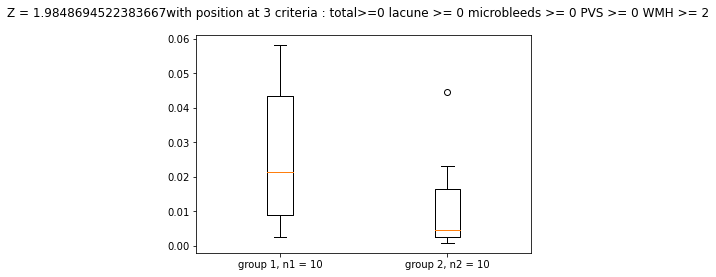

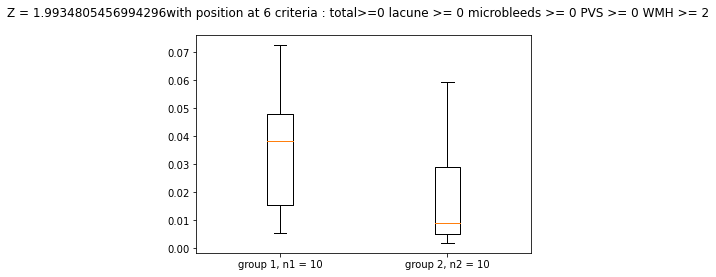

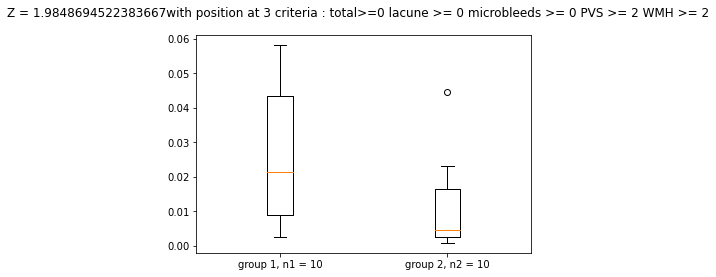

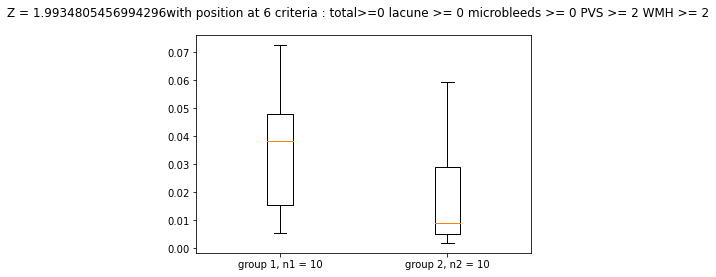

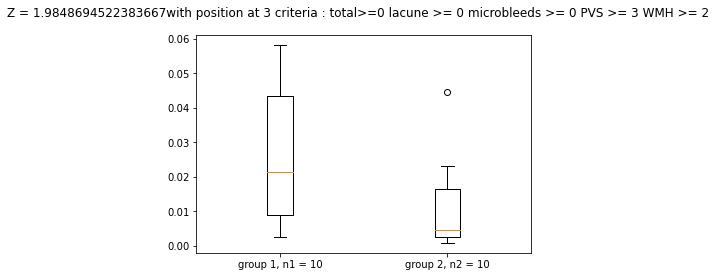

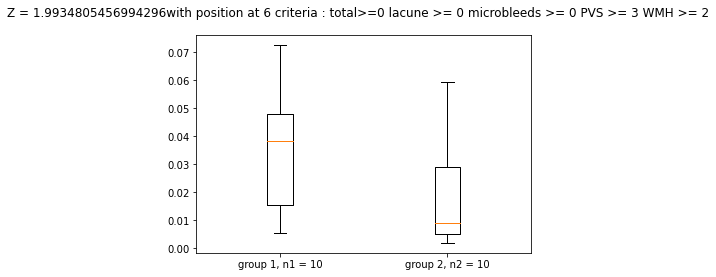

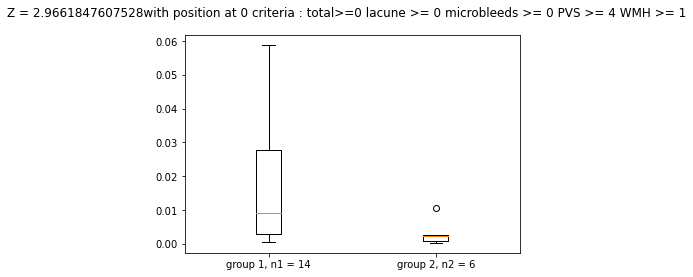

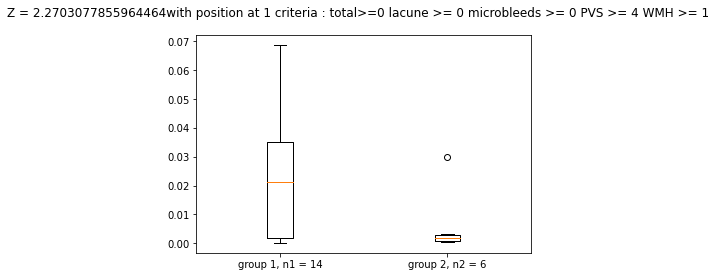

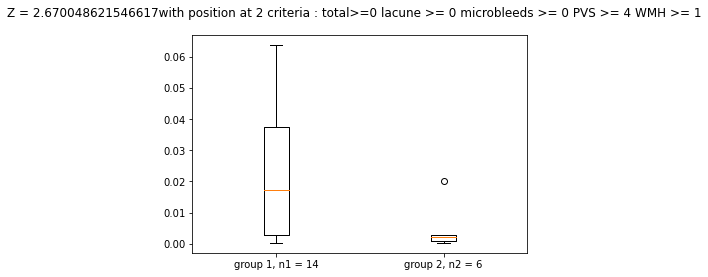

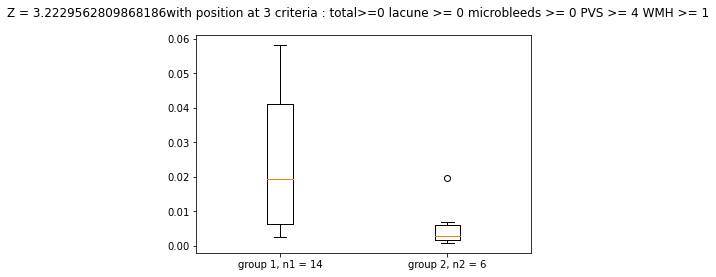

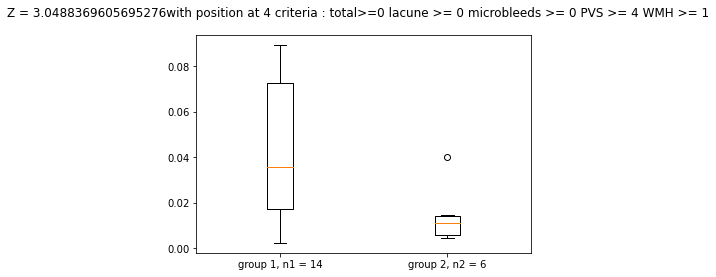

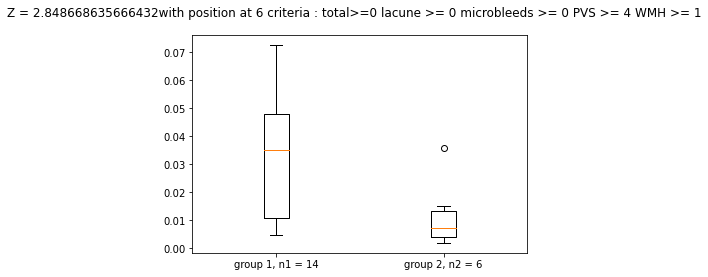

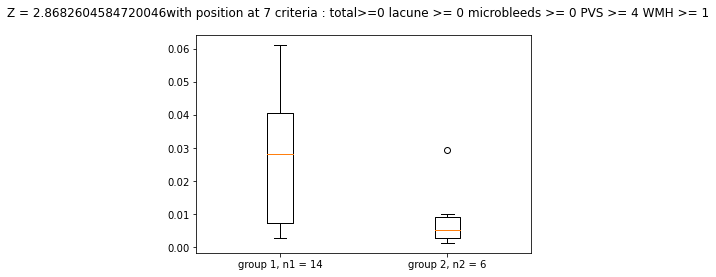

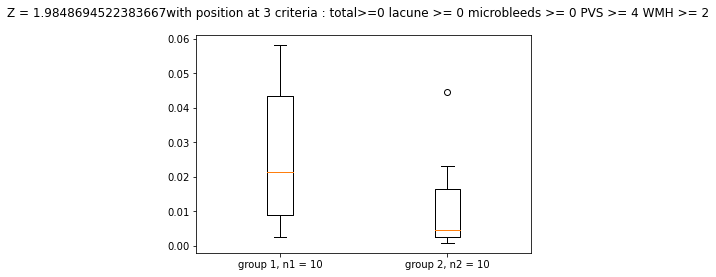

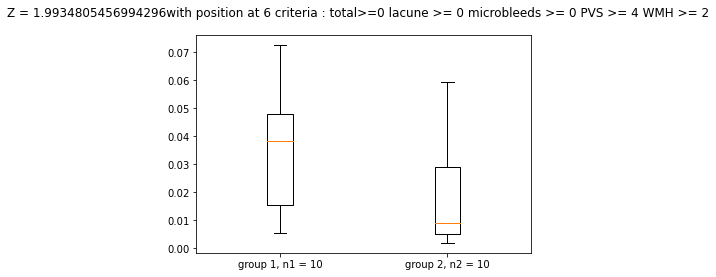

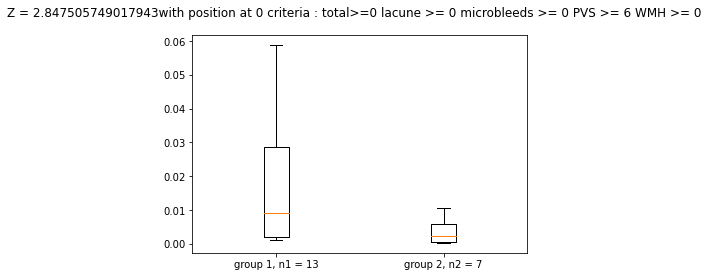

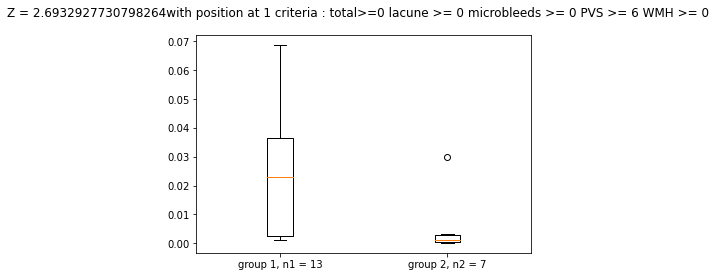

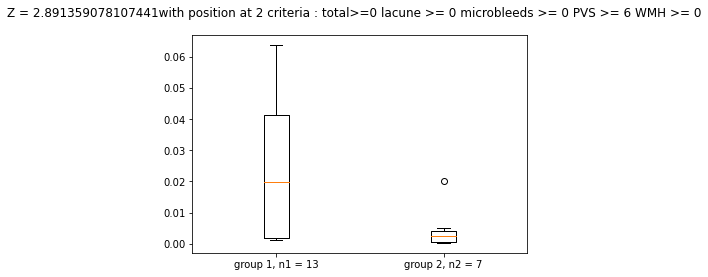

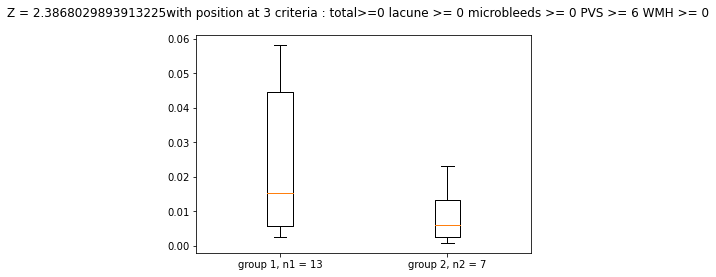

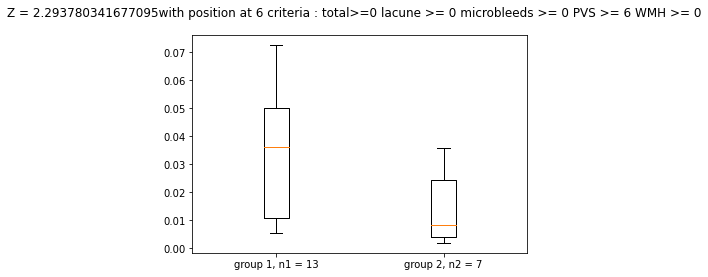

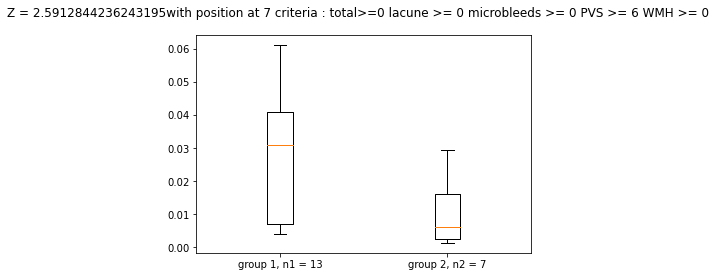

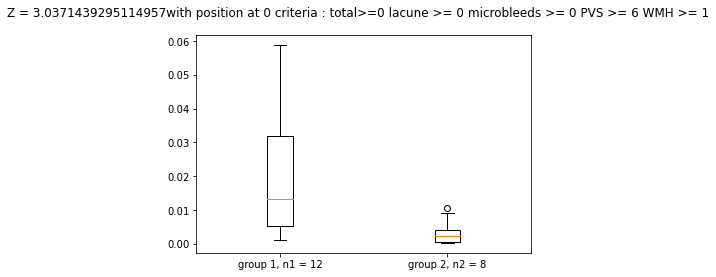

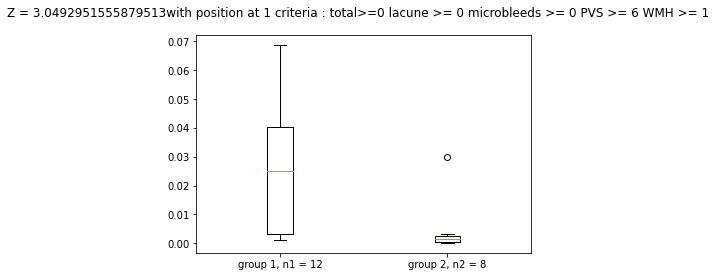

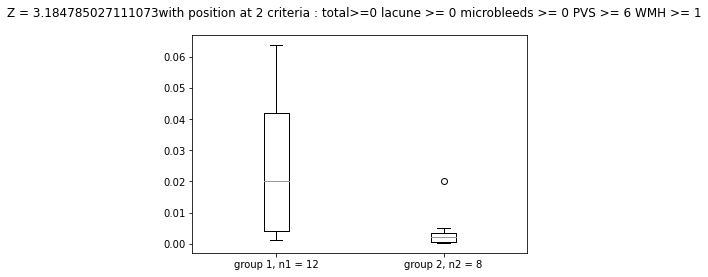

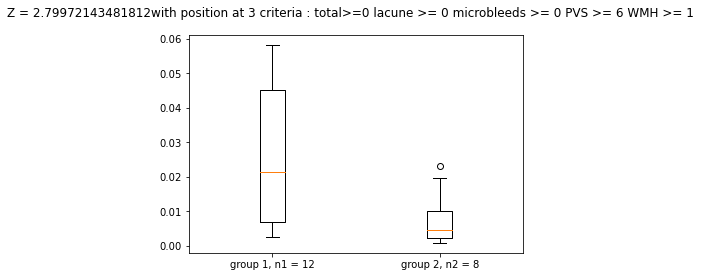

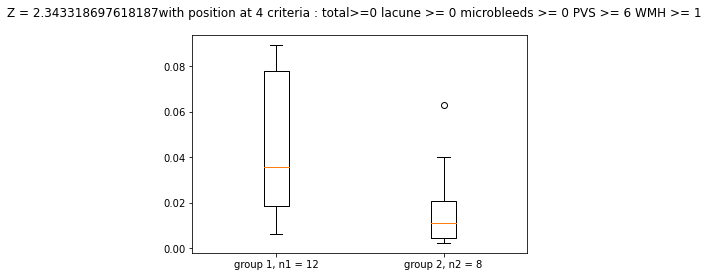

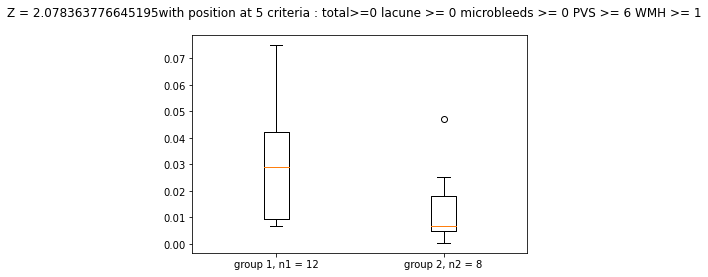

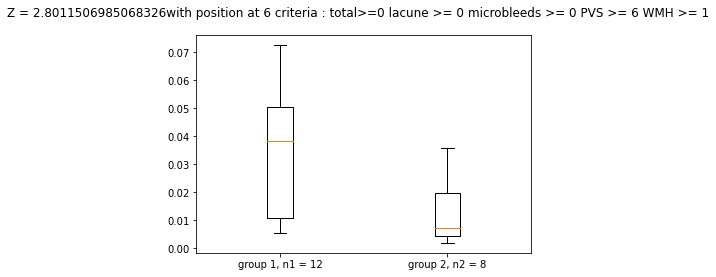

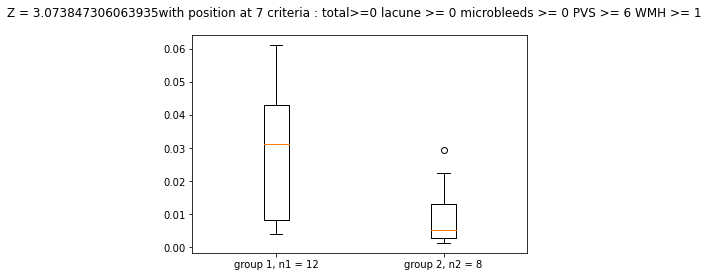

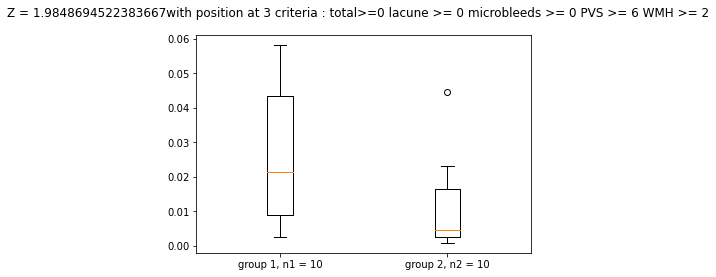

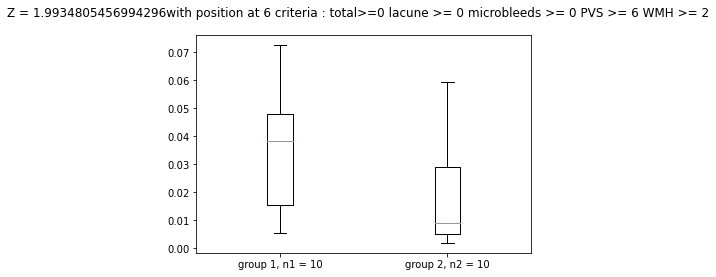

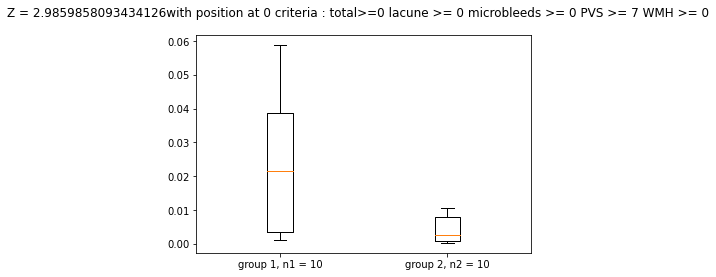

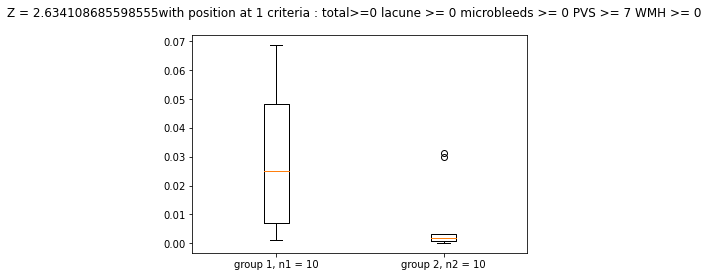

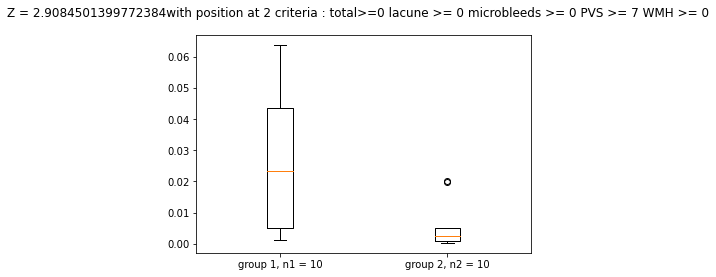

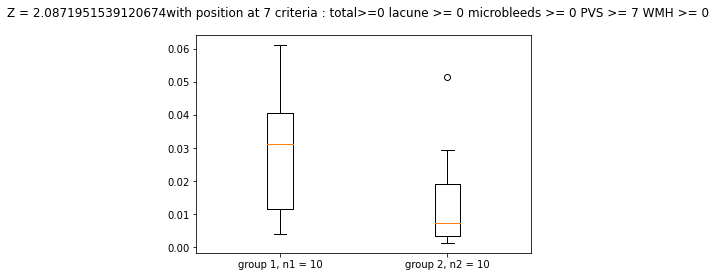

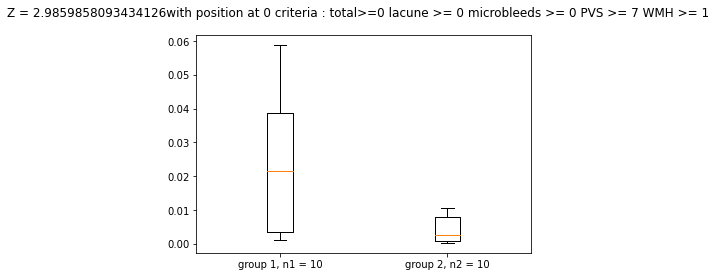

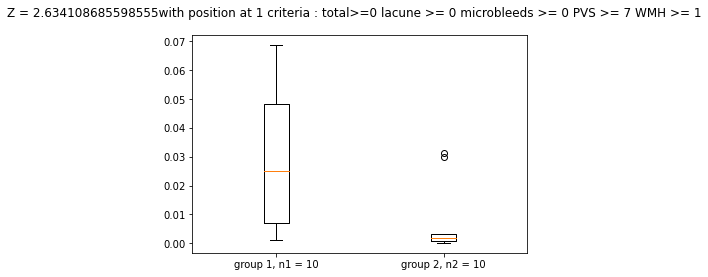

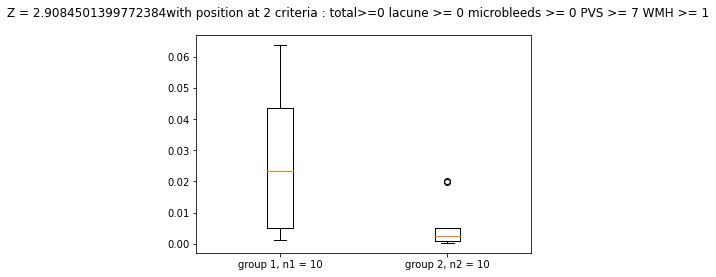

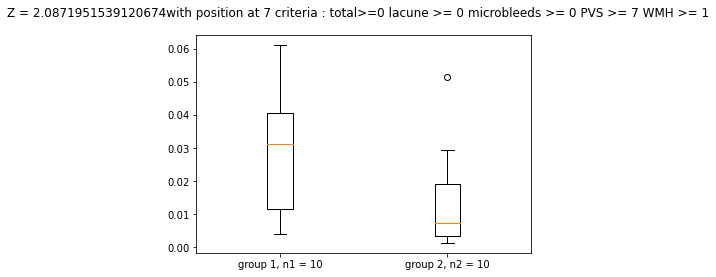

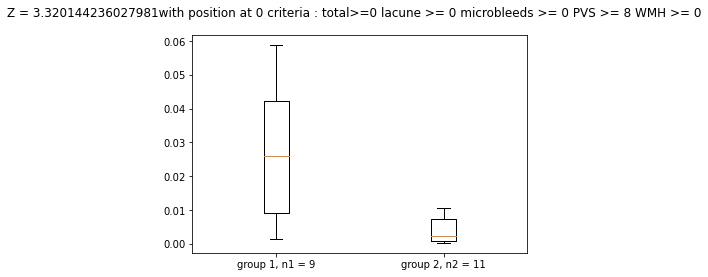

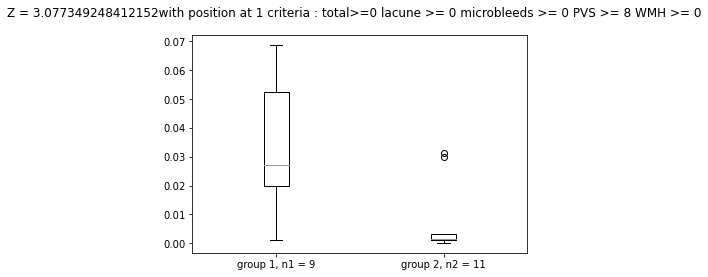

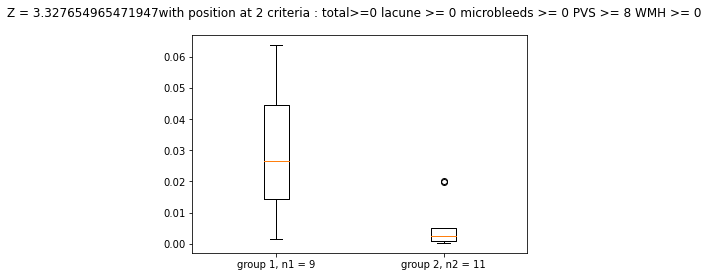

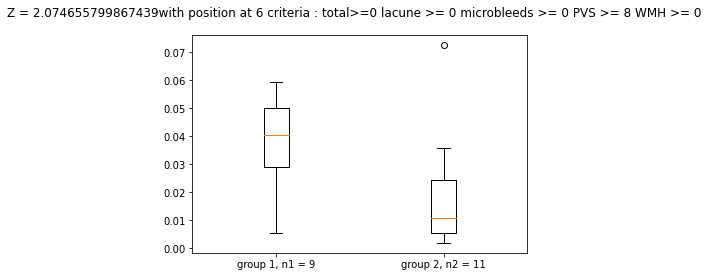

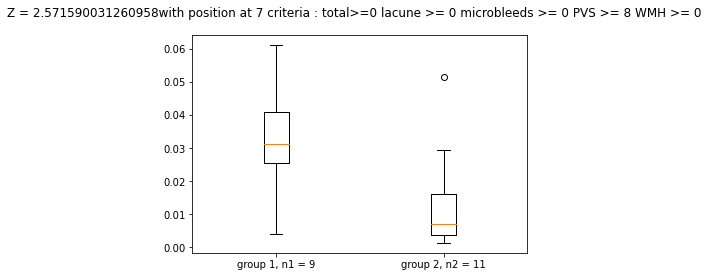

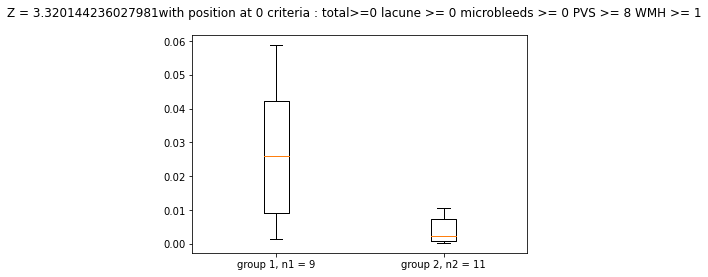

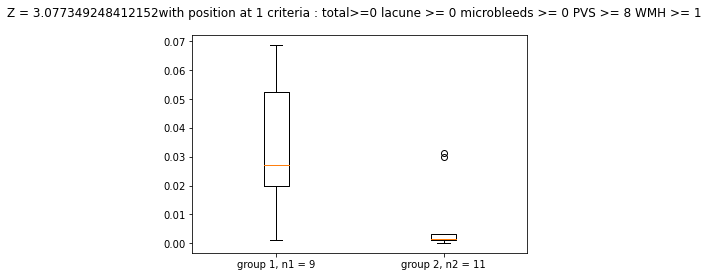

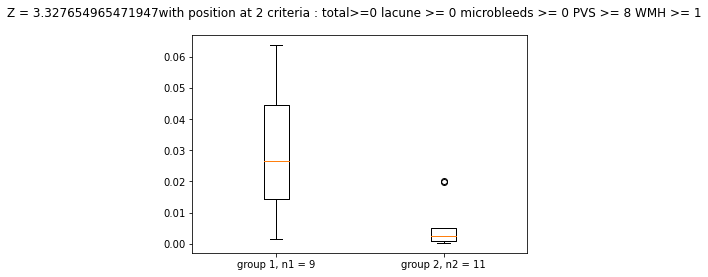

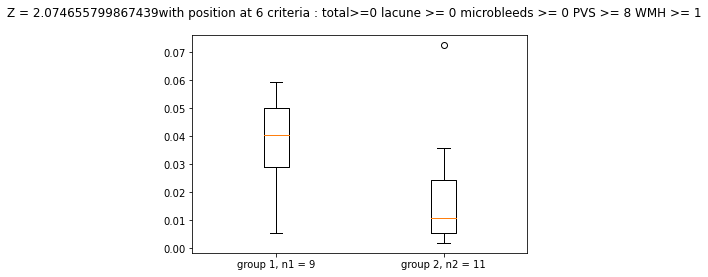

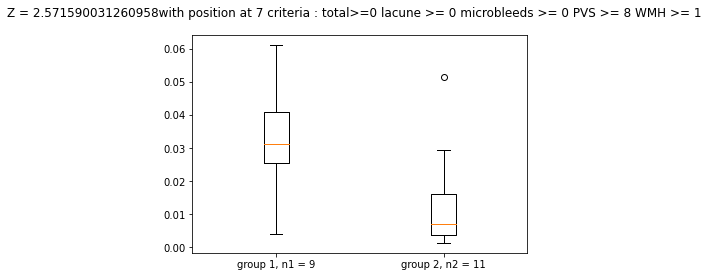

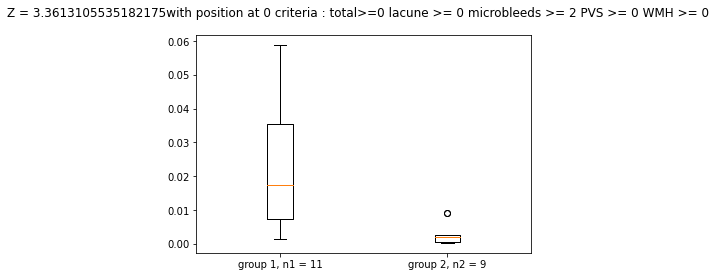

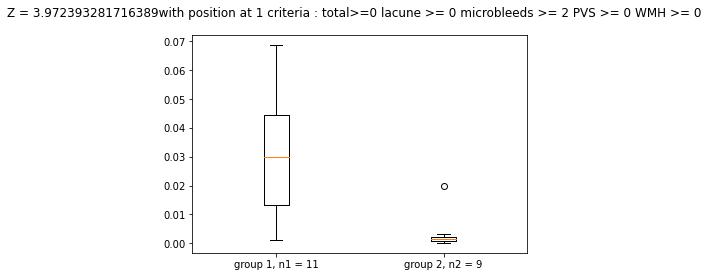

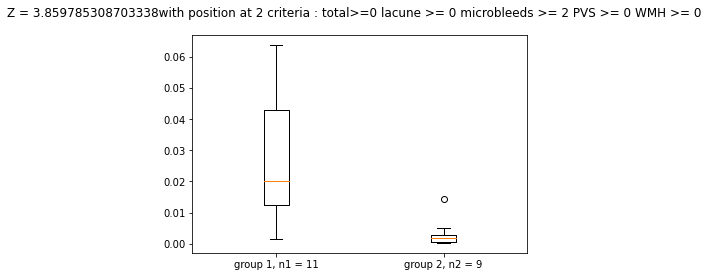

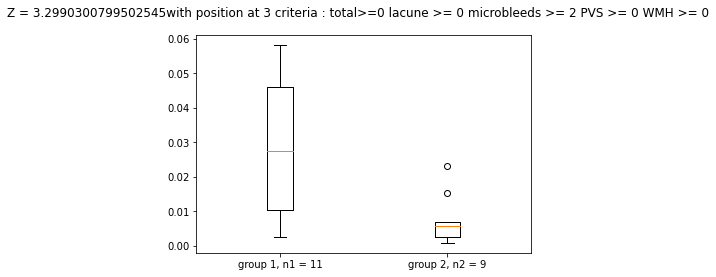

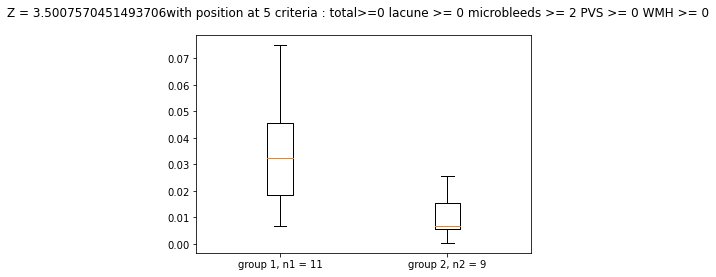

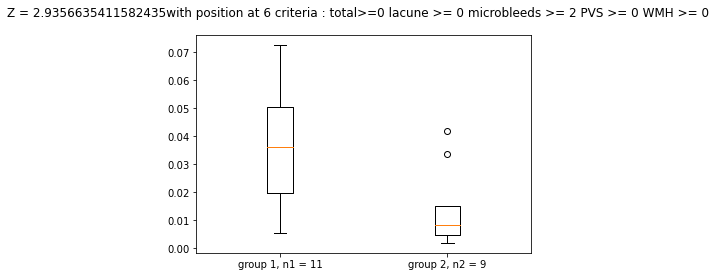

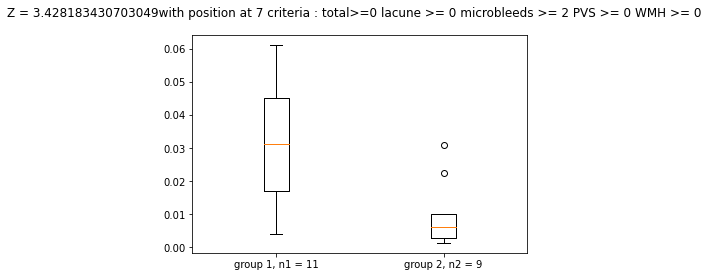

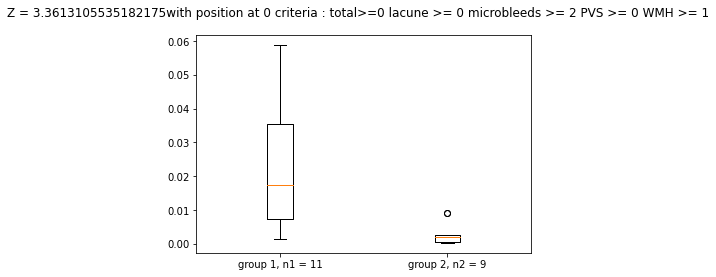

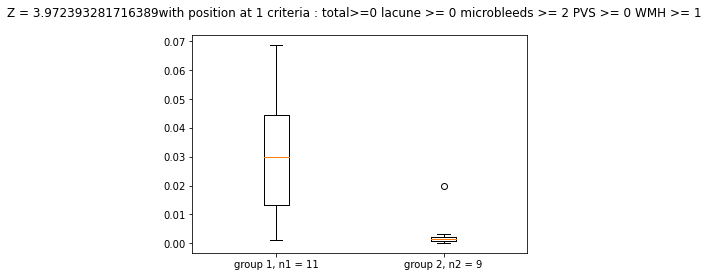

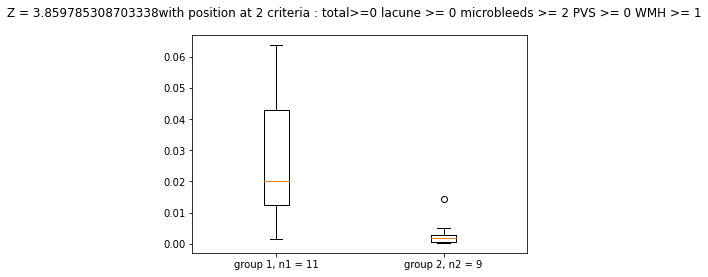

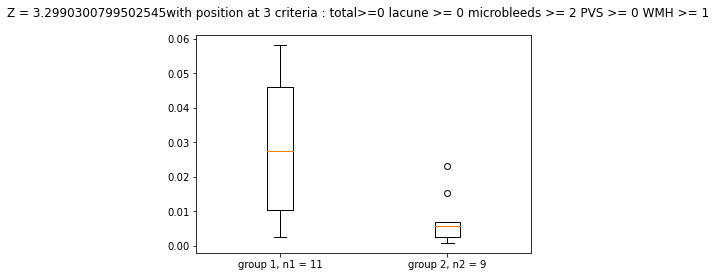

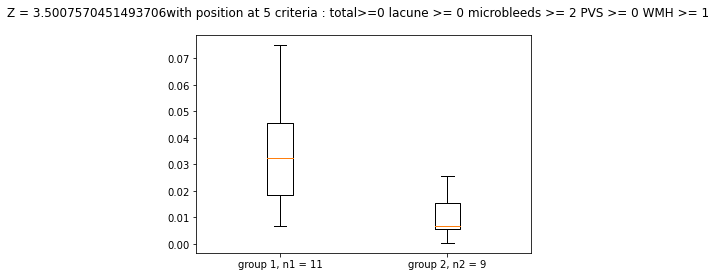

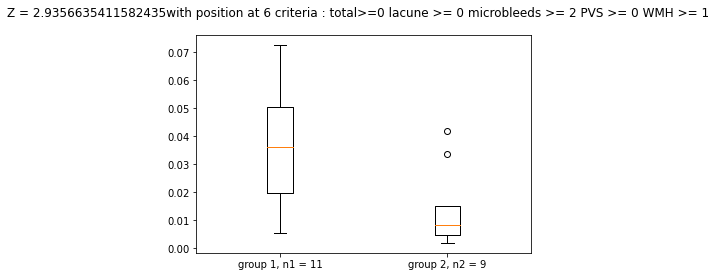

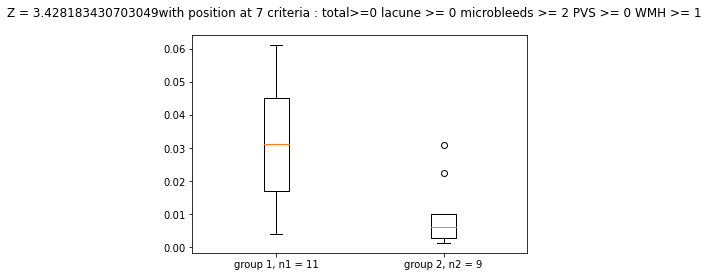

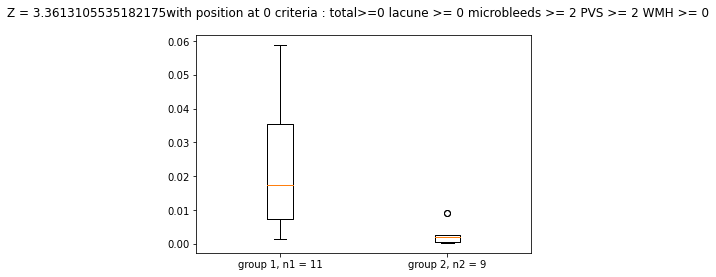

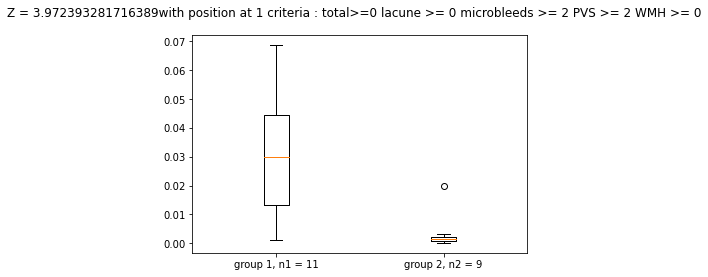

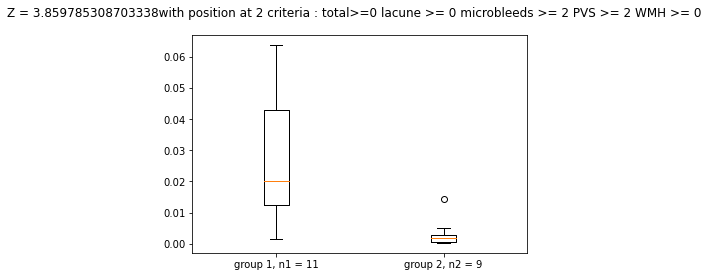

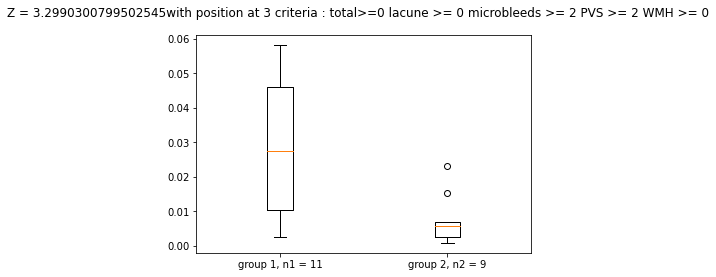

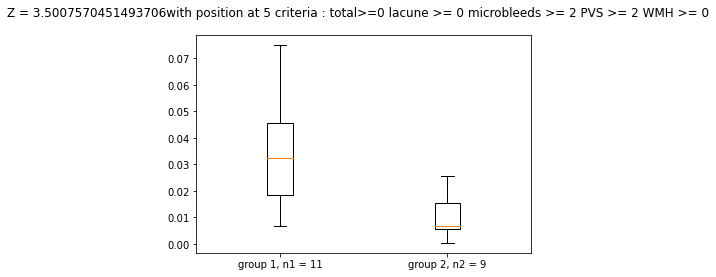

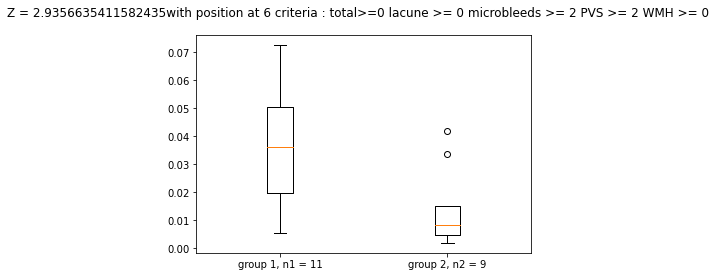

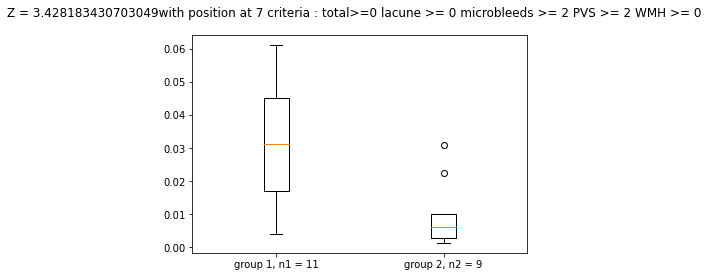

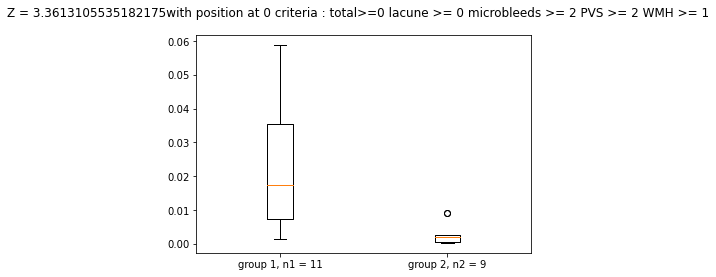

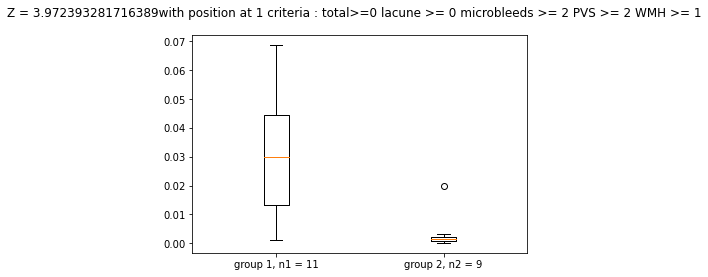

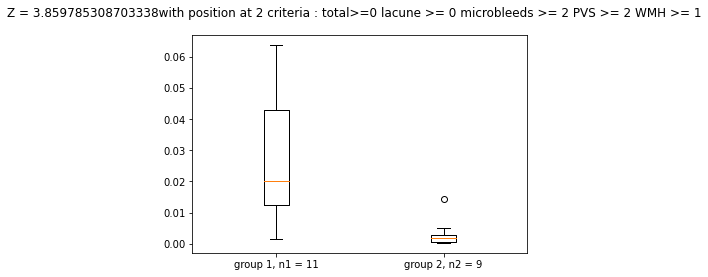

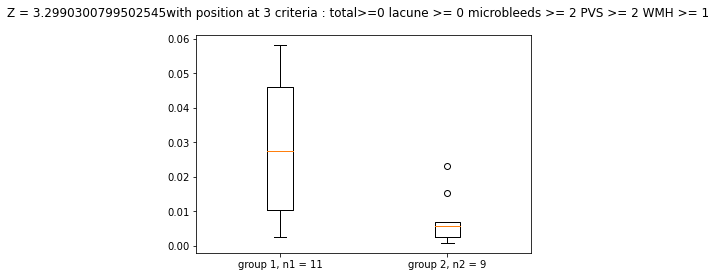

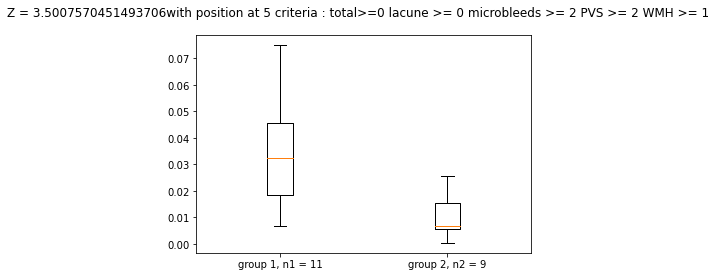

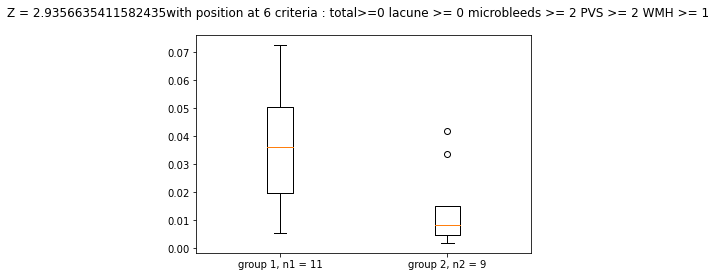

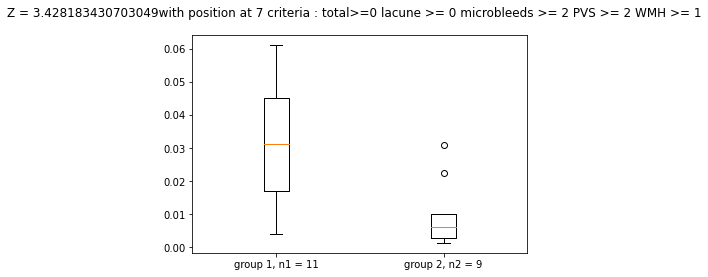

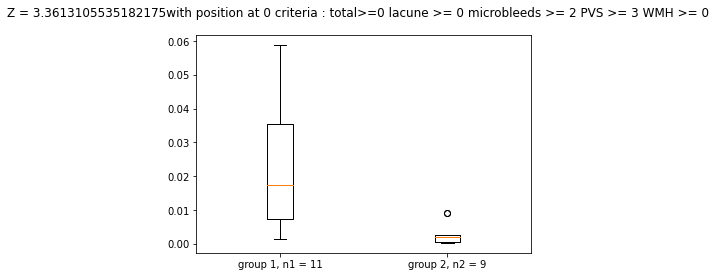

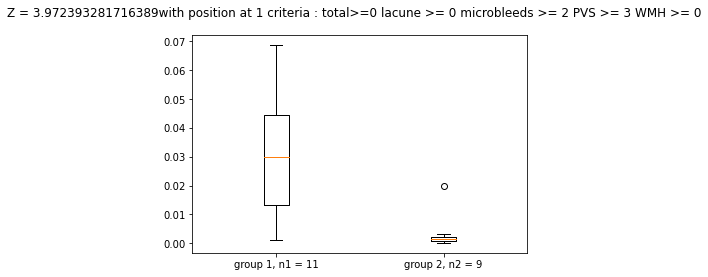

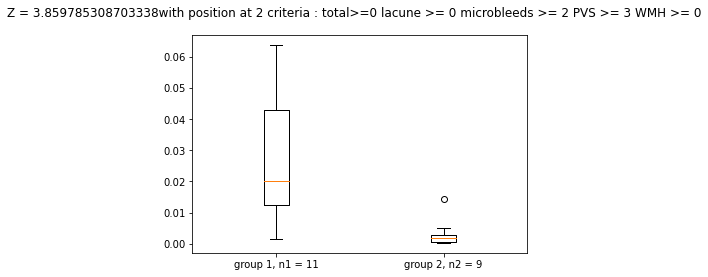

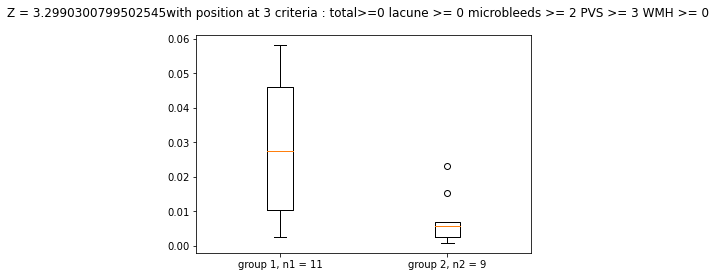

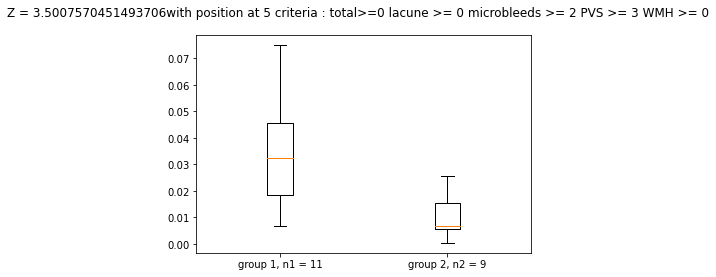

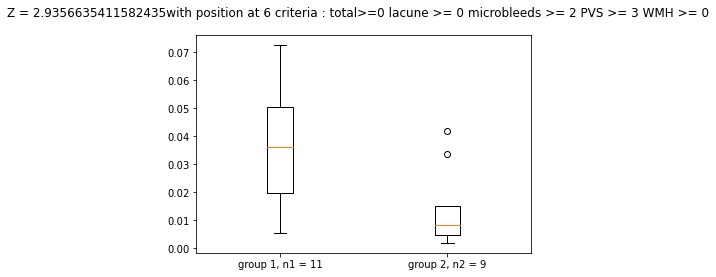

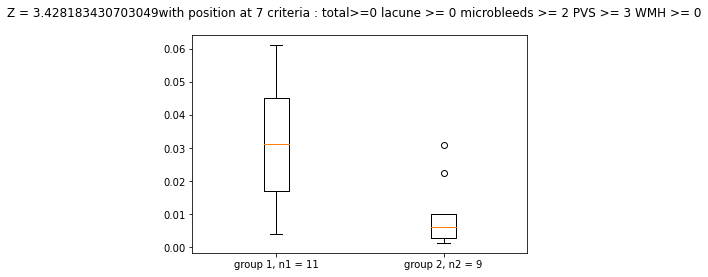

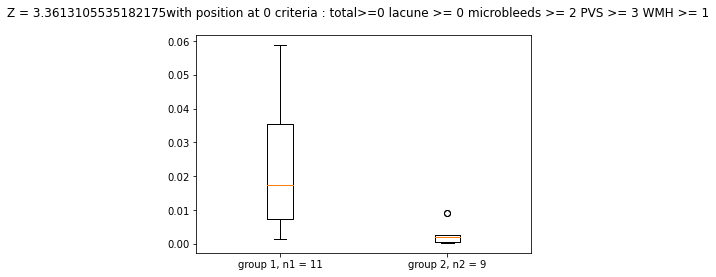

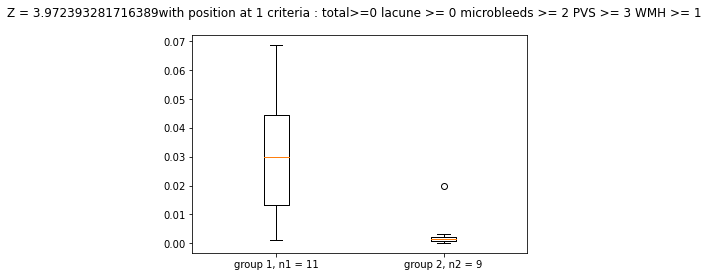

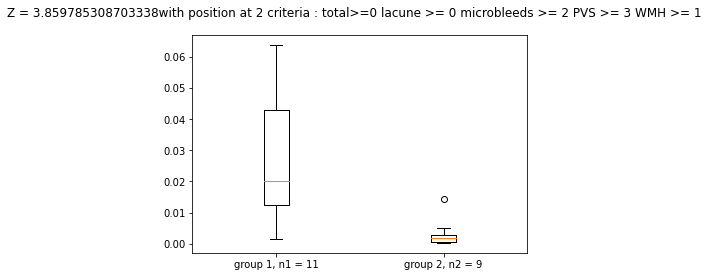

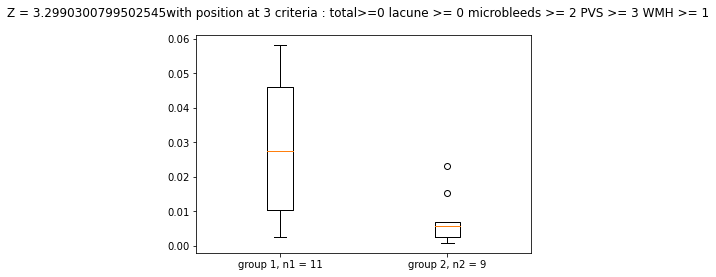

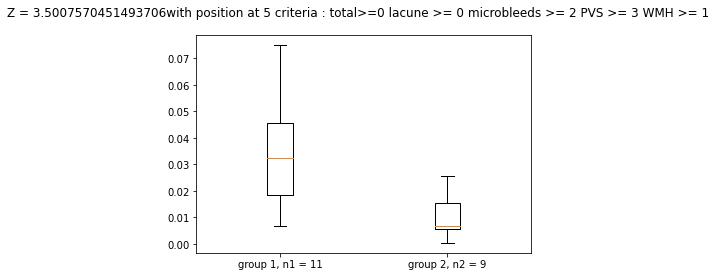

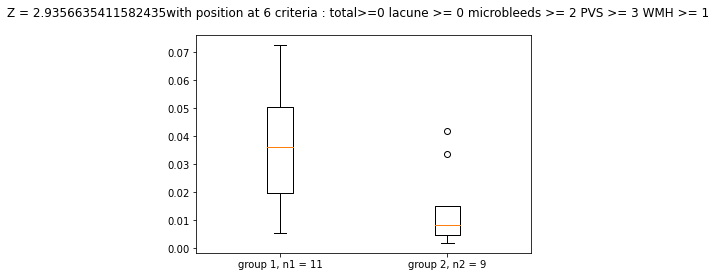

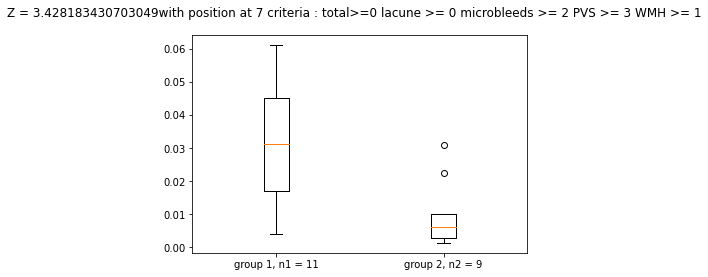

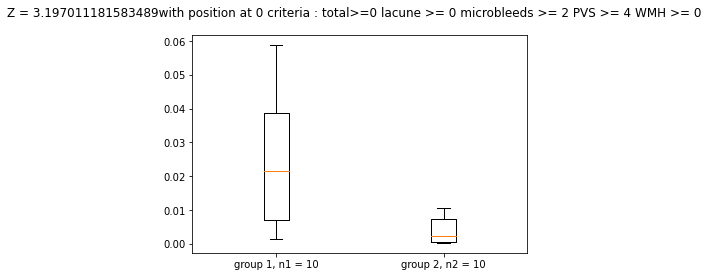

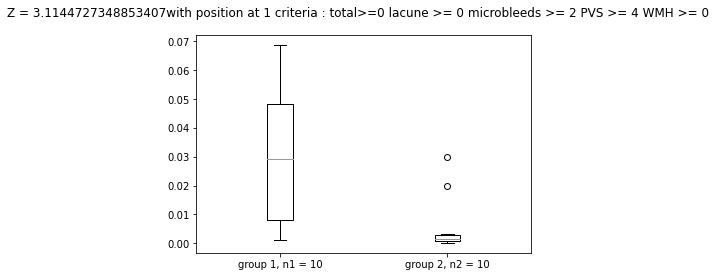

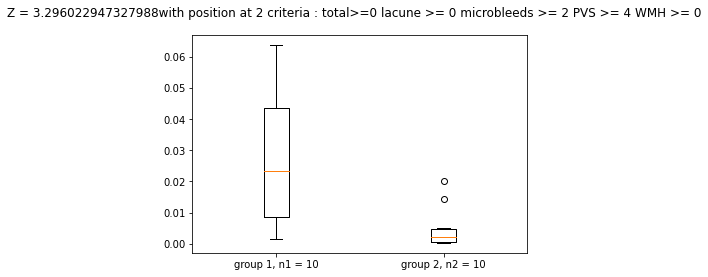

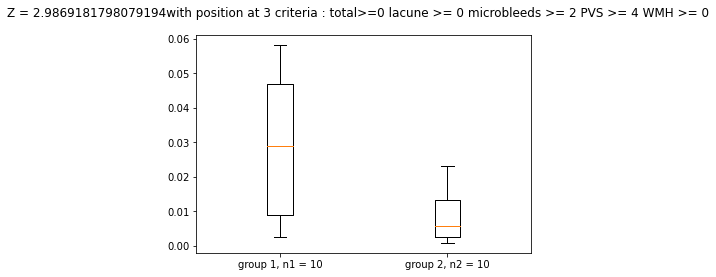

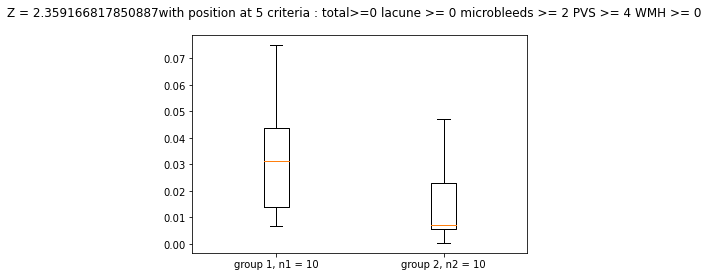

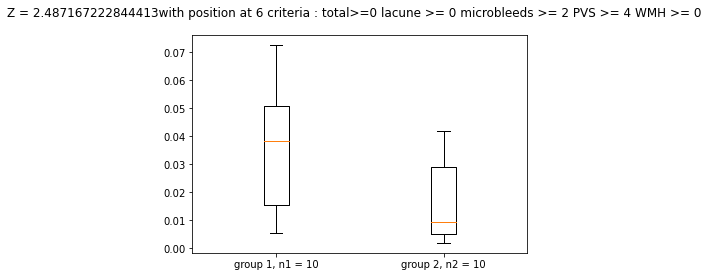

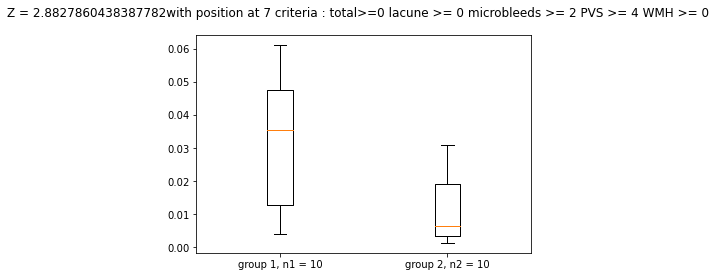

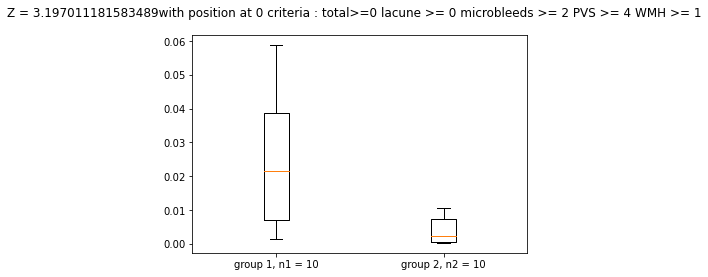

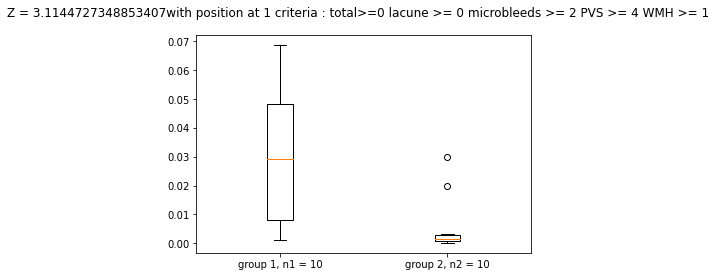

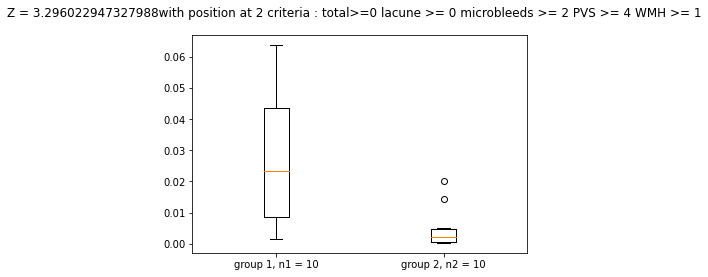

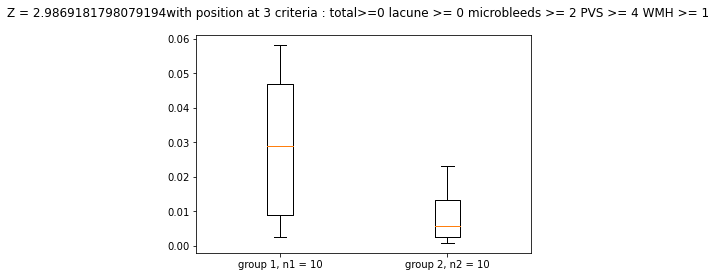

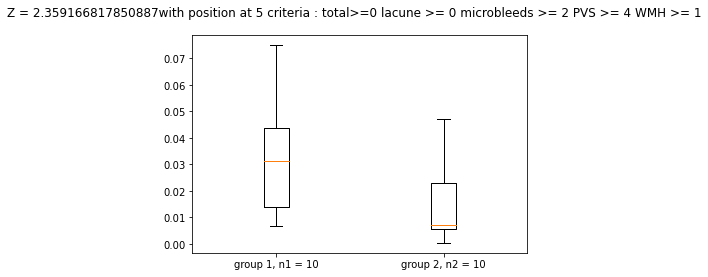

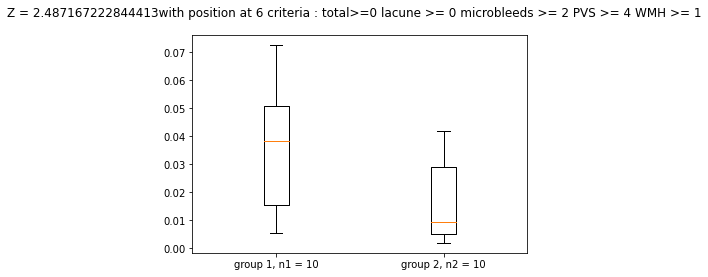

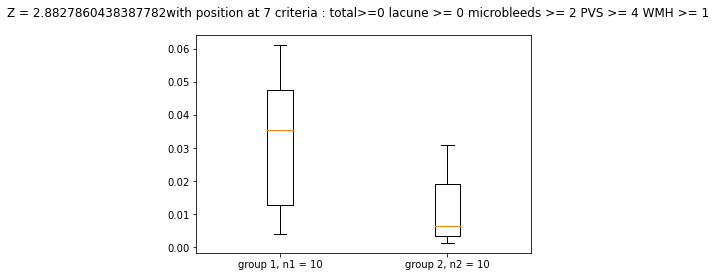

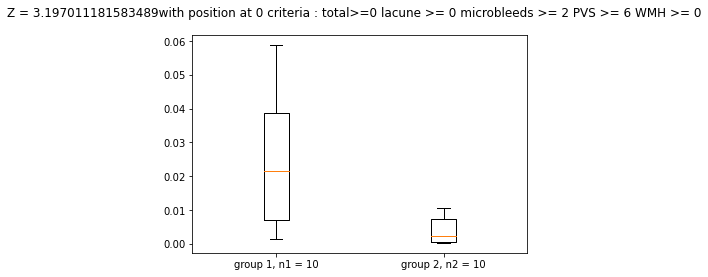

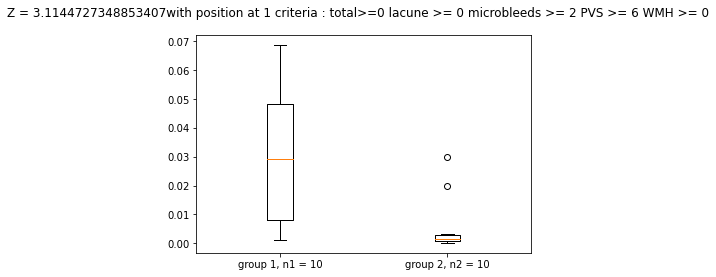

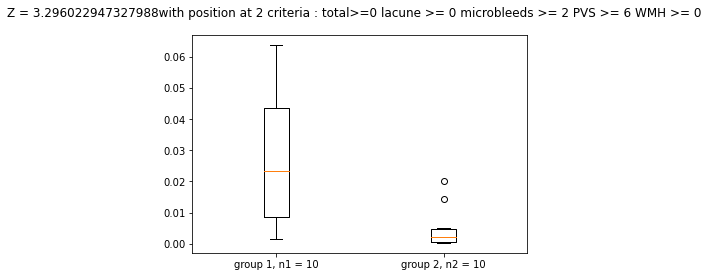

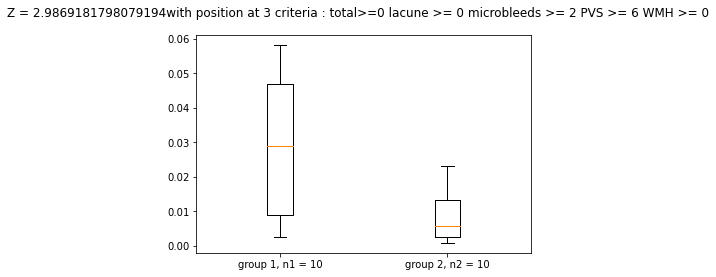

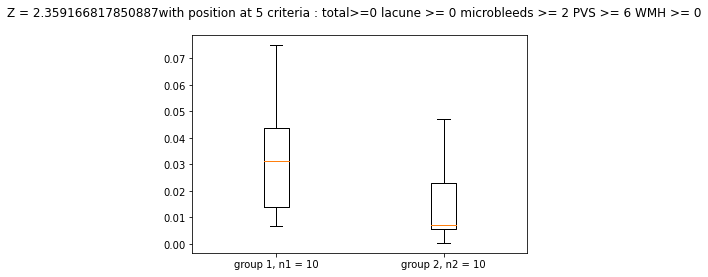

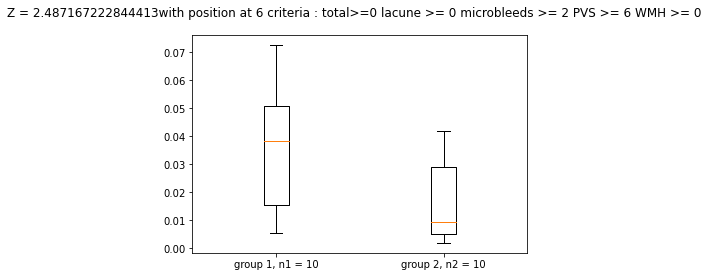

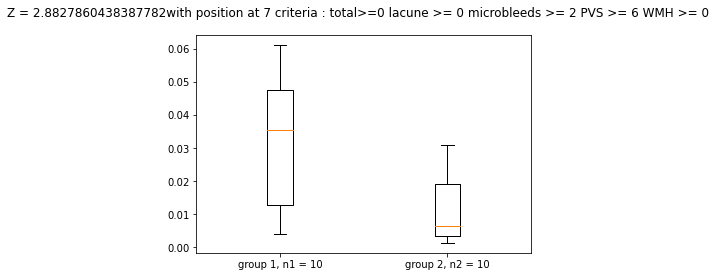

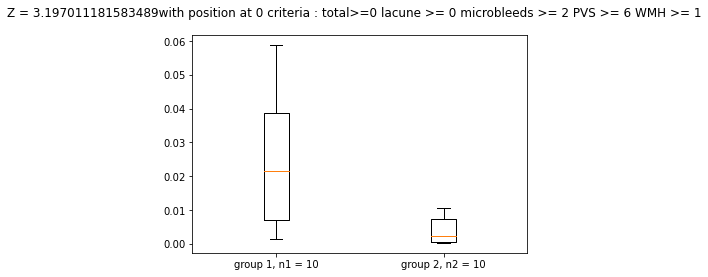

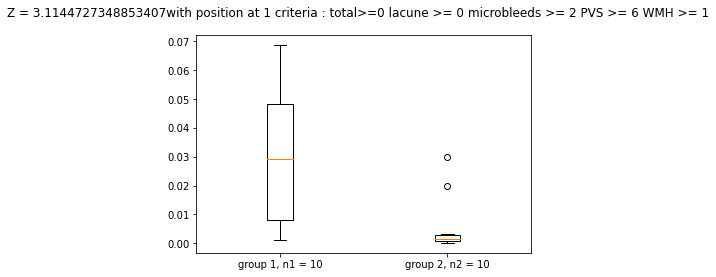

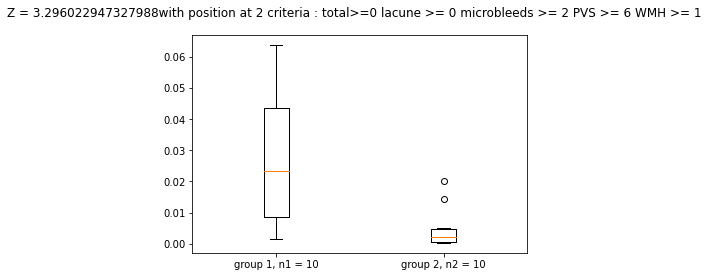

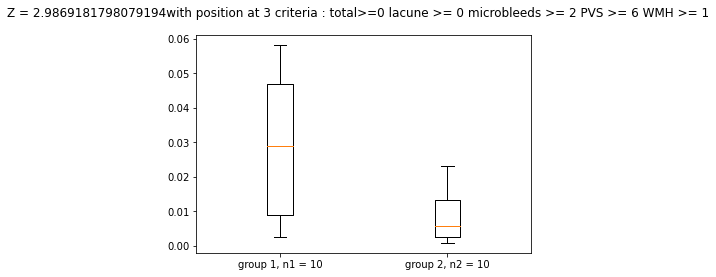

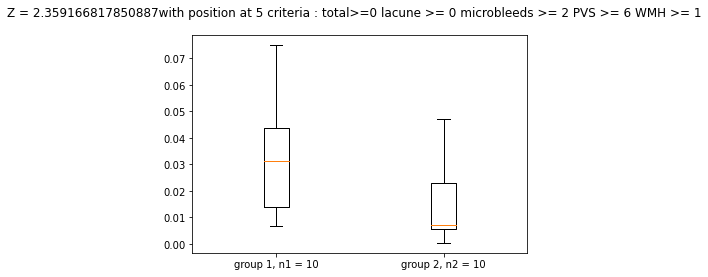

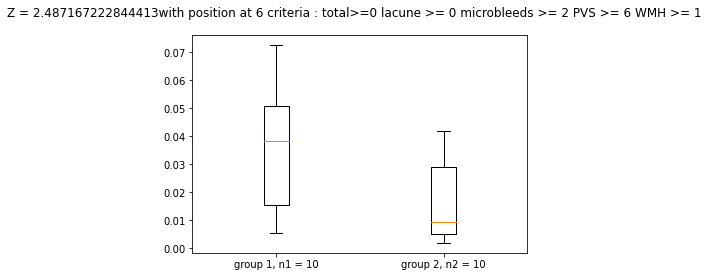

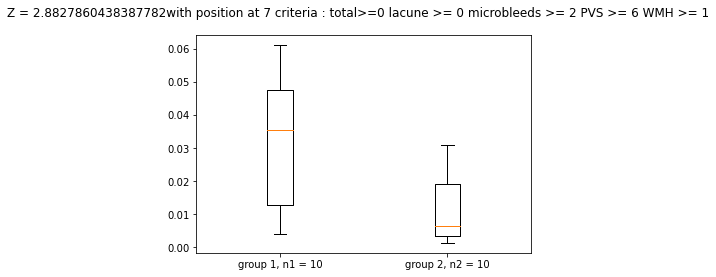

In [14]:
significant_array = []
significant_pid = []
for cri in range(len(criteria_list)):
    for Ki_loc in range(8):
        gp1 = separte_list[cri][0][:,Ki_loc]
        gp2 = separte_list[cri][1][:,Ki_loc]
        if (len(gp1)>8) & (len(gp2)>5):
#             print(separte_list[cri])
            Z = abs(result_mean[cri][0][Ki_loc]-result_mean[cri][1][Ki_loc])/np.sqrt(result_std[cri][0][Ki_loc]**2/len(separte_list[cri][0][:,Ki_loc])+result_std[cri][1][Ki_loc]**2/len(separte_list[cri][1][:,Ki_loc]))
            if Z>1.96:
                significant_array.append([Z, Ki_location[Ki_loc], 
                              criteria_list[cri][0],
                              criteria_list[cri][1],
                              criteria_list[cri][2],
                              criteria_list[cri][3],
                              criteria_list[cri][4]])
                significant_pid.append(separte_pid[cri])
                label_1 = "group 1, n1 = "+str(len(gp1))
                label_2 = "group 2, n2 = "+str(len(gp2))
                plt.boxplot([gp1, gp2], labels=(label_1, label_2))
                plt.suptitle("Z = "+str(Z)+ "with position at "+str(Ki_loc)+ " criteria : total>="+str(criteria_list[cri][0])+" lacune >= "+str(criteria_list[cri][1])+" microbleeds >= "+str(criteria_list[cri][2])+" PVS >= "+str(criteria_list[cri][3])+" WMH >= "+str(criteria_list[cri][4]))
                plt.show()
                

In [15]:
df_signif = pd.DataFrame(significant_array, columns = ['Z values', 'position', "total","lacune","microbleeds","PVS","WMH"])
df_pid = pd.DataFrame(significant_pid, columns = ["Group 1", "Group2"])

In [16]:
df_signif.to_csv('C:\\Users\\User\\Desktop\\without DM with significance.csv')
df_pid.to_csv('C:\\Users\\User\\Desktop\\without DM significance reference pid.csv', encoding = 'big5')


## Total v.s CH 

In [17]:
total_means = df.total_mean.values
frontal_mean = df.frontal_mean.values

In [18]:
import statsmodels.api as sm

In [19]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [20]:
model = sm.OLS( total_means.reshape(-1, 1), sm.add_constant(frontal_mean.reshape(-1, 1))) #(y,X)

In [21]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     38.41
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           7.53e-06
Time:                        23:01:42   Log-Likelihood:                 62.722
No. Observations:                  20   AIC:                            -121.4
Df Residuals:                      18   BIC:                            -119.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.003      2.998      0.0

In [22]:
results.params

array([0.0094965 , 0.86927877])

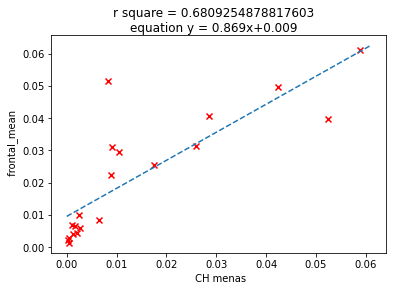

In [23]:
plt.scatter(frontal_mean,total_means, marker = 'x', color = 'r')
plt.xlabel(" CH menas")
plt.ylabel(" frontal_mean")
plt.suptitle('r square = '+str(results.rsquared)+'\n'+'equation y = '+str(round(results.params[1],3))+'x+'+str(round(results.params[0],3)))

# plt.suptitle('rr')
X = np.linspace(0, max(total_means),50)
plt.plot(X, results.params[0]+results.params[1]*X, '--')
plt.savefig('without DM frontal total.png')
plt.show()

## GM vs 

In [24]:
WM = [df.frontal_mean.values,df.Parietal_mean.values]
GM = [df.CH_mean.values,df.BG_mean.values,df.TH_mean.values]

In [25]:
WM_index = ['frontal mean', 'parietal mean']
GM_index = ['CH mean', 'BG mean', 'TH mean']

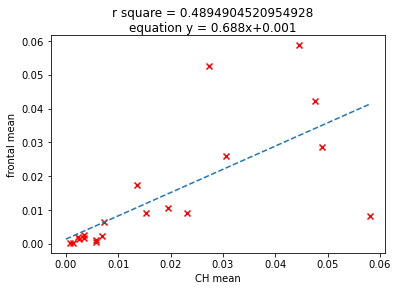

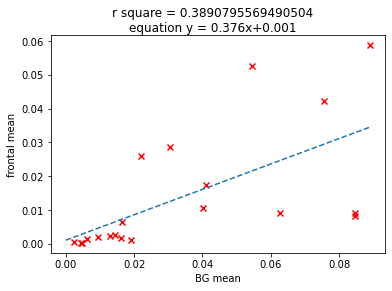

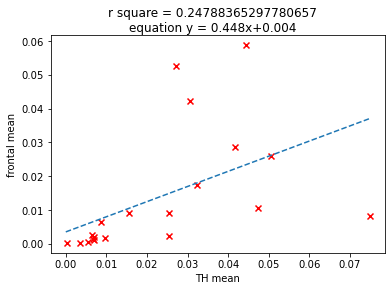

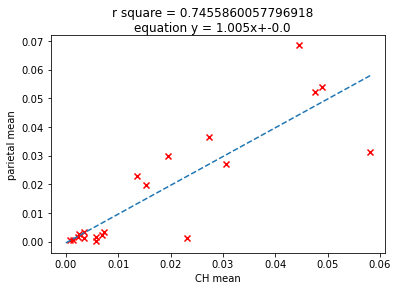

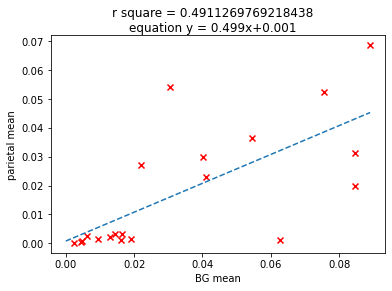

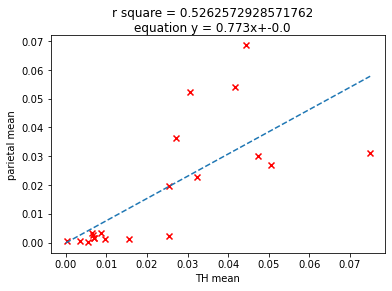

In [26]:
count = 0
for WM_idx in range(len(WM)):
    for GM_idx in range(len(GM)):
        model = sm.OLS( WM[WM_idx].reshape(-1, 1), sm.add_constant(GM[GM_idx].reshape(-1, 1))) #(y,X)
        results = model.fit()
        plt.scatter(GM[GM_idx],WM[WM_idx], marker = 'x', color = 'r')
        plt.xlabel(GM_index[GM_idx])
        plt.ylabel(WM_index[WM_idx])
        plt.suptitle('r square = '+str(results.rsquared))
        plt.suptitle('r square = '+str(results.rsquared)+'\n'+'equation y = '+str(round(results.params[1],3))+'x+'+str(round(results.params[0],3)))

        X = np.linspace(0, max(GM[GM_idx]),50)
        plt.plot(X, results.params[0]+results.params[1]*X, '--')
        if results.rsquared > 0.7:
            plt.savefig("without DM GM WM coorelation fig "+str(count)+'.png')
            count+=1
        plt.show()